# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [2]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pylab as pl
import numpy as np
import seaborn as sns
%matplotlib inline

### Step 2: Read in your data set 

In [4]:
#Read in data from source 
df_raw = pd.read_csv("../assets/admissions.csv")
print df_raw.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Questions
#### Question 1. How many observations are in our dataset? 


In [5]:
df_raw.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

Answer: 400

#### Question 2. Create a summary table

In [6]:
df_raw.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


#### Question 3. Why would GRE have a larger STD than GPA?

Answer:  Because GRE has a larger scale of possibilites than GPA (which only has a range from 0.0  - 4.0).

#### Question 4. Drop data points with missing data


In [7]:
df_raw[df_raw.isnull().any(axis=1)] # displays 

,admit,gre,gpa,prestige
187,0,NaN,NaN,2.0
212,0,NaN,2.87,2.0
236,1,660.0,NaN,NaN


In [8]:
newdf_raw = df_raw.dropna(how='any') # drops rows with any null values

#### Question 5. Confirm that you dropped the correct data. How can you tell? 

Answer: I can tell by counting the new dataset and seeing if all variables have the same # of values.

In [9]:
newdf_raw.count()

admit       397
gre         397
gpa         397
prestige    397
dtype: int64

In [10]:
newdf_raw.describe()

,admit,gre,gpa,prestige
count,397.000000,397.000000,397.000000,397.000000
mean,0.317380,587.858942,3.392242,2.488665
std,0.466044,115.717787,0.380208,0.947083
min,0.000000,220.000000,2.260000,1.000000
25%,0.000000,520.000000,3.130000,2.000000
50%,0.000000,580.000000,3.400000,2.000000
75%,1.000000,660.000000,3.670000,3.000000
max,1.000000,800.000000,4.000000,4.000000


#### Question 6. Create box plots for GRE and GPA

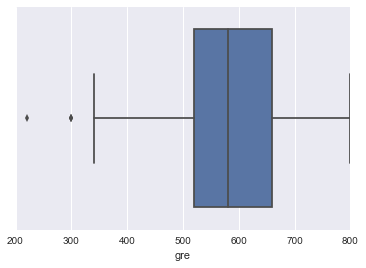

In [11]:
sns.boxplot(newdf_raw['gre'])

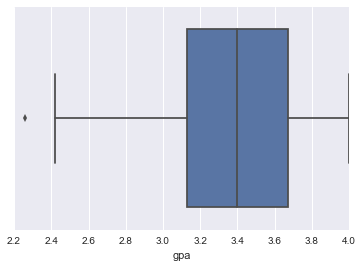

In [12]:
sns.boxplot(newdf_raw['gpa'])

#### Question 7. What do this plots show?

Answer: These plots show that for GRE, there are a couple outliers that scored lower. GRE scores also seem to follow a normal distribution pattern, with the median very close to the center of the graph. GPA, however, is a bit more skewed to the left. It seems like the largest concentration of people received GPAs within the first interquartile range.

#### Question 8. Describe each distribution 

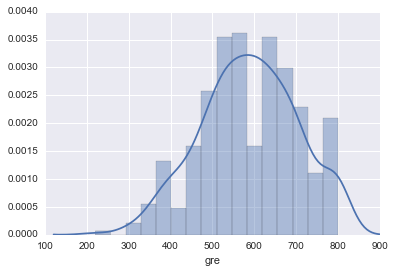

In [13]:
sns.distplot(newdf_raw['gre'])

GRE: The GRE is almost in a normal distribution, skewed slightly to the left. 

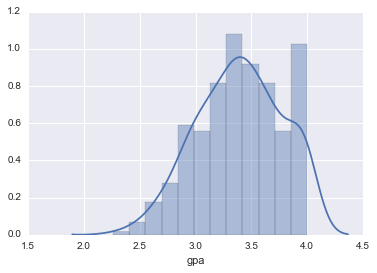

In [14]:
sns.distplot(newdf_raw['gpa'])

GRE seems to follow almost normal distribution, skewed slightly to the left. GPA is also skewed slightly to the left, with a small second peak at 4.0.

#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

Answer: No, both GRE and GPA have negative skews.

In [15]:
newdf_raw.skew()

admit       0.787669
gre        -0.146047
gpa        -0.216889
prestige    0.086506
dtype: float64

#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer: No, the distribution doesn't need correction, because the skews aren't extreme. In this case, I don't think we would want to correct the distribution. Because graduate schools of different prestige levels may attract applicants with naturally higher GRE/GPAs, normalizing the distribution may not make sense in this case.

#### Question 11. Which of our variables are potentially colinear? 

None of the variables look potentially colinear.

In [54]:
newdf_raw.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


#### Question 12. What did you find?

Answer: Looking at the .corr() chart, none of these variables look potentially colinear. The strongest correlation exists between GPA and GRE. 

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Answer: I would plot a linear regression and see if the values are in line with a statistically significant correlation.

#### Question 14. What is your hypothesis? 

Answer: There will be no statistically significant correlation between prestige and admittance.

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data

#### 2. Bonus: Log transform the skewed data

#### 3. Advanced: Impute missing data